In [2]:
import pandas as pd

In [5]:
from google.colab import drive
drive.mount("/content/drive")
df=pd.read_csv('/content/drive/MyDrive/twitt30k.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,twitts,sentiment
0,@robbiebronniman Sounds like a great night.,1
1,Damn the person who stolde my wallet !!!!! Ma...,1
2,Greetings from the piano bench (photo) http:/...,1
3,@drewryanscott i love it!! i love you!! haha f...,1
4,"@kissthestars Pretty pretty pretty please, pak...",0


In [6]:
print(df.shape)
print(len(df))
print(df.isnull().sum())
print(df.columns)

(30000, 2)
30000
twitts       0
sentiment    0
dtype: int64
Index(['twitts', 'sentiment'], dtype='object')


Dataset consist of 30000 rows and 2 columns . here we also see that dataset doesn't have any null values .


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    15000
0    15000
Name: sentiment, dtype: int64

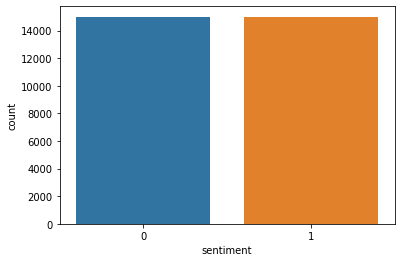

In [7]:
import seaborn as sns
sns.countplot('sentiment',data=df)
df['sentiment'].value_counts()

Here we see that count of positive and negative reviews are same

Here 
* 0  -> negative
* 1  -> Positive  

In [8]:
## Let's see some tweets
df['twitts'][2],df['twitts'][5100],df['twitts'][100]

('Greetings from the piano bench  (photo) http://twitpic.com/6oe8i',
 "@theDeanoRama Thank you darlin'!  you're one of a kind!  a special one of a kind that will never be taken 4 granted by me ",
 "@yelyahwilliams Hayley, I'm yer biggest fan! Come to the Philippines, please! ")

We can see that we have so much useless data to remove it 

we need to clean the data

for cleaning we are going to use `re` (regex) 

process : 
    1. Lower Casing: Each text is converted to lowercase.
    2. Replacing URLs: Links starting with "http" or "https" or "www" are replaced by "URL".
    3. Replacing Emojis: Replace emojis by using a pre-defined dictionary containing emojis along with their meaning. (eg: ":)" to "EMOJIsmile")
    4. Replacing Usernames: Replace @Usernames with word "USER". (eg: "@Kaggle" to "USER")
    5. Removing Non-Alphabets: [^a-zA-z]
    6. Removing Consecutive letters: 3 or more consecutive letters are replaced by 2 letters. (eg: "Heyyyy" to "Heyy")
    7. Removing Short Words: Words with length less than 2 are removed.
    8. Removing Stopwords: Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. (eg: "the", "he", "have")
    9. Lemmatizing: Lemmatization is the process of converting a word to its base form. (e.g: “Great” to “Good”)


    

In [9]:
EMOJIS = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}
URLPATTERN        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
USERPATTERN       = '@[^\s]+'
SEQPATTERN   = r"(.)\1\1+"
SEQREPLACE = r"\1\1"

In [17]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
wordLemm = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [18]:
########### SAMPLE TWITTS CLEANING FOR INDEX 2020 #############
import re
## lower casing
text = df["twitts"][2020].lower()
### Replacing URL
text = re.sub(URLPATTERN,' URL',text)
### Replacing EMOJI
for emoji in EMOJIS.keys():
    text = text.replace(emoji, "EMOJI" + EMOJIS[emoji])  
### Replacing USER pattern
text = re.sub(USERPATTERN,' URL',text)
### Removing non-alphabets
text = re.sub('[^a-zA-z]'," ",text)
### Removing consecutive letters
text = re.sub(SEQPATTERN,SEQREPLACE,text)
text = text.split()
text = [wordLemm.lemmatize(word) for word in text if not word in stopwords.words('english') and len(word) > 1]
text = ' '.join(text)
text

'URL yes red wing going win cup second year row'

In [19]:
length = len(df['twitts'])
length

30000

In [20]:
import time
t = time.time()
corpus = []
for i in range(0,length):
    ## lower casing
    text = df["twitts"][i].lower()
    ### Replacing URL
    text = re.sub(URLPATTERN,' URL',text)
    ### Replacing EMOJI
    for emoji in EMOJIS.keys():
        text = text.replace(emoji, "EMOJI" + EMOJIS[emoji])  
    ### Replacing USER pattern
    text = re.sub(USERPATTERN,' URL',text)
    ### Removing non-alphabets
    text = re.sub('[^a-zA-z]'," ",text)
    ### Removing consecutive letters
    text = re.sub(SEQPATTERN,SEQREPLACE,text)
    text = text.split()
    text = [wordLemm.lemmatize(word) for word in text if not word in stopwords.words('english') and len(word) > 1]
    text = ' '.join(text)
    corpus.append(text)
print(f'Time Taken: {round(time.time()-t)} seconds')

Time Taken: 58 seconds


In [21]:
corpus

['URL sound like great night',
 'damn person stolde wallet may karma come back bite as',
 'greeting piano bench photo URL',
 'URL love love haha forget hug give kiss lie please would awesome',
 'URL pretty pretty pretty please pakidownload ito reupload someother site like mediafire hindi mgwork ang mu skin',
 'really upset URL',
 'URL big pool paddling pool might able manage paddle pool surroundings luxury get',
 'URL hee tweet lol',
 'happy ticket concert',
 'URL URL miley look soo much better like soo laid back',
 'must go bed early',
 'shh quitely come see found hole fence URL',
 'uh oh sound messed cable',
 'fest',
 'best',
 'finally made hammock innagual tweet yahoo peace harmony',
 'URL allowed call live uk parent say cost much suck',
 'URL suck make sad know love talk suck',
 'favourite silver hook nutty stock right URL',
 'finally leaving hell car sound awful ugh',
 'realised ive spent clothes today',
 'singing duo aussie koala URL URL',
 'URL im running battery wont last long 

In [22]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,2))
X_cv = cv.fit_transform(corpus).toarray()

tfid = TfidfVectorizer(max_features=5000,ngram_range=(1,2))
X_tfid = cv.fit_transform(corpus).toarray()

In [23]:
y = df['sentiment']
y

0        1
1        1
2        1
3        1
4        0
        ..
29995    0
29996    0
29997    0
29998    1
29999    1
Name: sentiment, Length: 30000, dtype: int64

In [24]:
#######################################
########## Count Vectorizer ###########
#######################################
## Divide the dataset into Train and Test
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cv, y, test_size=0.20, random_state=0)

from sklearn.naive_bayes import MultinomialNB,GaussianNB
model_cv = MultinomialNB().fit(X_train, y_train)
y_pred=model_cv.predict(X_test)
print(np.array(y_pred))

from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test,y_pred)
print(cm,score*100)

[1 0 1 ... 0 0 0]
[[2234  820]
 [ 778 2168]] 73.36666666666667


In [25]:
#######################################
########## TFIdf Vectorizer ###########
#######################################
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tfid, y, test_size=0.20, random_state=0)

from sklearn.naive_bayes import MultinomialNB
model_tfid = MultinomialNB().fit(X_train, y_train)

y_pred=model_tfid.predict(X_test)
print(np.array(y_pred))

from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test,y_pred)
print(cm,score*100)

[1 0 1 ... 0 0 0]
[[2234  820]
 [ 778 2168]] 73.36666666666667


In [26]:
import pickle

# Save trained model to file
pickle.dump(model_cv, open("twitter30k.pkl", "wb"))

In [27]:
import pickle
pickle.dump(cv, open('cv.pkl', 'wb'))

In [28]:
loaded_model = pickle.load(open("twitter30k.pkl", "rb"))
y_pred = loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)

0.7336666666666667

In [29]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), np.array(y_test).reshape(len(y_test),1)),1))

[[1 0]
 [0 0]
 [1 1]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [30]:
import pickle
cv = pickle.load(open("cv.pkl", "rb"))
model = pickle.load(open("twitter30k.pkl", "rb"))


def new_review(new_review):
    new_review = new_review
    ## lower casing
    text = new_review.lower()
    ### Replacing URL
    text = re.sub(URLPATTERN,' URL',text)
    ### Replacing EMOJI
    for emoji in EMOJIS.keys():
        text = text.replace(emoji, "EMOJI" + EMOJIS[emoji])  
    ### Replacing USER pattern
    text = re.sub(USERPATTERN,' URL',text)
    ### Removing non-alphabets
    text = re.sub('[^a-zA-z]'," ",text)
    ### Removing consecutive letters
    text = re.sub(SEQPATTERN,SEQREPLACE,text)
    text = text.split()
    text = [wordLemm.lemmatize(word) for word in text if not word in stopwords.words('english') and len(word) > 1]
    text = ' '.join(text)
    new_corpus = [text]
    #print(new_corpus)
    
    
    
    
    new_X_test = cv.transform(new_corpus).toarray()
    new_y_pred = model.predict(new_X_test)
    return new_y_pred

new_review = new_review(str(input("Enter new review...")))
if new_review[0]==1:
    print("Positive😀")
else :
    print("Negative😑")

Enter new review...am loving it
Positive😀
